In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

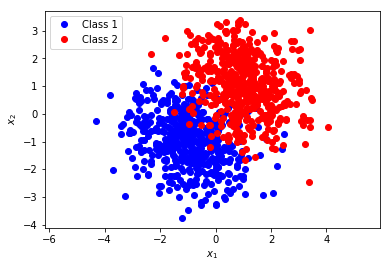

In [2]:
x = np.random.multivariate_normal([-1, -1], [[1, -.25], [-.25, 1]], 500).T
x_test = np.random.multivariate_normal([-1, -1], [[1, -.25], [-.25, 1]], 150).T
y = np.random.multivariate_normal([1, 1], [[1, -.25], [-.25, 1]], 500).T
y_test = np.random.multivariate_normal([1, 1], [[1, -.25], [-.25, 1]], 150).T
plt.plot(x[0], x[1], 'o', c='b')
plt.plot(y[0], y[1], 'o', c='r')
plt.axis('equal')
plt.xlabel('$x_1$')  # use latex in the figure axis labels
plt.ylabel('$x_2$')
plt.legend(("Class 1", "Class 2"))
plt.show()

[0 0 0 ..., 1 1 1]


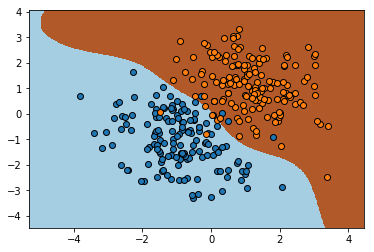

accuracy with rbf kernel 0.953333333333


In [3]:
X=np.stack((x[0][:], x[1][:]), axis=-1)
Y=np.stack((y[0][:], y[1][:]), axis=-1)
Z=np.concatenate((X, Y), axis=0)
O=np.concatenate((np.full((500), 0), np.full((500), 1)), axis=0)
clf = svm.SVC(kernel='rbf')
clf.fit(Z, O) 
h = .02 
x_axis=np.concatenate((x[0], y[0]), axis=0);
y_axis=np.concatenate((x[1], y[1]), axis=0)
x_min, x_max = x.min() - 1, x.max() + 2
y_min, y_max = y.min() - 2, y.max() + 0
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z)
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x[0][:150], x[1][:150], cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(y[0][:150], y[1][:150], cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()
X_test=np.stack((x_test[0][:], x_test[1][:]), axis=-1)
Y_test=np.stack((y_test[0][:], y_test[1][:]), axis=-1)
Z_test=np.concatenate((X_test, Y_test), axis=0)
O_test=np.concatenate((np.full((150), 0), np.full((150), 1)), axis=0)
print("accuracy with rbf kernel",clf.score(Z_test,O_test)) 

[0 0 0 ..., 1 1 1]


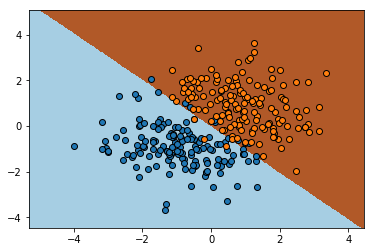

accuracy with linear kernel 0.963333333333


In [4]:
X=np.stack((x[0][:], x[1][:]), axis=-1)
Y=np.stack((y[0][:], y[1][:]), axis=-1)
Z=np.concatenate((X, Y), axis=0)
O=np.concatenate((np.full((500), 0), np.full((500), 1)), axis=0)
clf = svm.SVC(kernel='linear')
clf.fit(Z, O) 
h = .02 
x_axis=np.concatenate((x[0], y[0]), axis=0);
y_axis=np.concatenate((x[1], y[1]), axis=0)
x_min, x_max = x.min() - 1, x.max() + 2
y_min, y_max = y.min() - 2, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(x_test[0][:150], x_test[1][:150], cmap=plt.cm.Paired, edgecolors='k')
plt.scatter(y_test[0][:150], y_test[1][:150], cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()
X_test=np.stack((x_test[0][:], x_test[1][:]), axis=-1)
Y_test=np.stack((y_test[0][:], y_test[1][:]), axis=-1)
Z_test=np.concatenate((X_test, Y_test), axis=0)
O_test=np.concatenate((np.full((150), 0), np.full((150), 1)), axis=0)
print("accuracy with linear kernel",clf.score(Z_test,O_test)) 